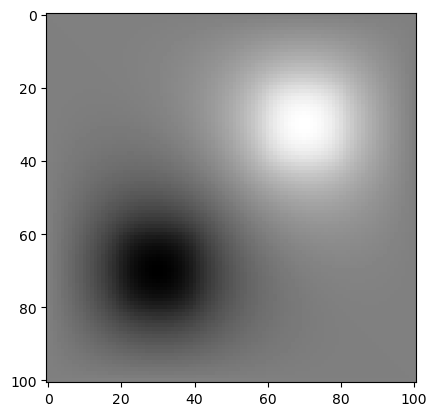

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
epsilon0 = 1

phi = np.zeros([M+1,M+1], float)
phiprime = np.empty([M+1,M+1], float)
rho = np.zeros([M+1,M+1], float)

for i in range(60,81):
    for j in range(20,41):
        rho[i,j] = -1
for i in range(20,41):
    for j in range(60,81):
        rho[i,j] = 1

delta = 1
while delta>target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1] + rho[i,j]/10000)
    delta = np.max(abs(phiprime-phi))
    phi,phiprime = phiprime,phi
    
plt.imshow(phi, 'gray')


Exercise 9.2

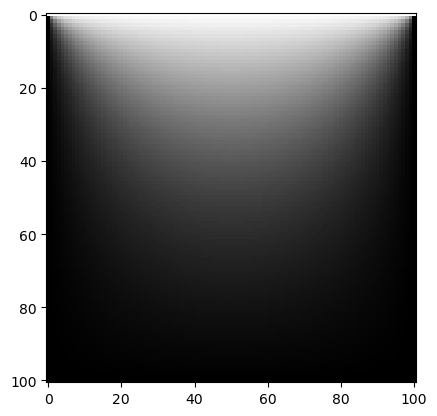

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
V = 1
w = 0.9

phi = np.zeros([M+1,M+1], float)
phi[0,:] = V

delta = 1
while delta>target:
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            else:
                delta_ij = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - phi[i,j]
                phi[i,j] = phi[i,j] + (1+w)*(delta_ij)
                if abs(delta_ij) > delta:
                    delta = abs(delta_ij)
    
plt.imshow(phi, 'gray')


Exercise 9.3

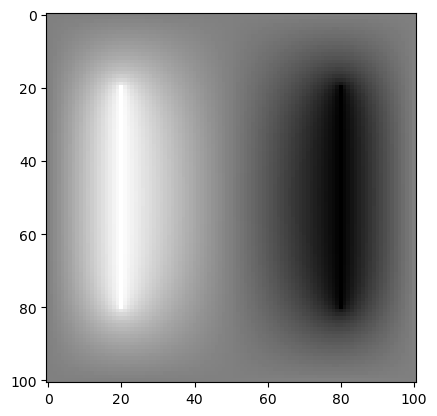

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
V = 1
w = 0.9

phi = np.zeros([M+1,M+1], float)

for i in range(20,81):
    phi[i,20] = V
    phi[i,80] = -V

delta = 1
while delta>target:
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            elif i>=20 and i<=80 and (j==20 or j==80):
                phi[i,j] = phi[i,j]
            else:
                delta_ij = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - phi[i,j]
                phi[i,j] = phi[i,j] + (1+w)*(delta_ij)
                if abs(delta_ij) > delta:
                    delta = abs(delta_ij)
    
plt.imshow(phi, 'gray')


Exercise 9.4

<function matplotlib.pyplot.show(close=None, block=None)>

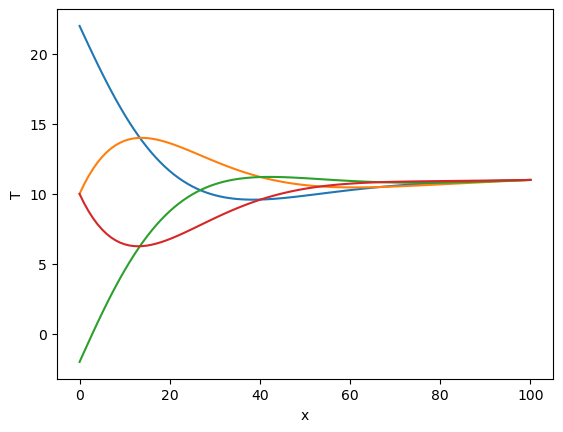

In [14]:
import numpy as np
import matplotlib.pyplot as plt

tao = 365*24*60*60
A = 10
B = 12
TS_i = 10
TD_i = 11
D = 0.1/(24*60*60)
L = 20
N = 100
a = L/N
h = 1*60*60
epsilon = h/1000

t1 = 9*365*24*60*60 + (365/4)*24*60*60
t2 = t1 + (365/4)*24*60*60
t3 = t2 + (365/4)*24*60*60
t4 = t3 + (365/4)*24*60*60
tend = t4 + epsilon

T = np.empty(N+1, float)
T[0] = TS_i
T[N] = TD_i
T[1:N] = 10
Tp = np.empty(N+1, float)
Tp[0] = TS_i
Tp[N] = TD_i

t = 0.0
c = h*D/(a*a)

while t<tend:
    Tp[0] = A + B*np.sin(2*np.pi*t/tao)
    Tp[1:N] = T[1:N] + c*(T[0:N-1] + T[2:N+1] - 2*T[1:N])
    T,Tp = Tp,T
    t += h
    
    if abs(t-t1)<epsilon:
        plt.plot(T)
    if abs(t-t2)<epsilon:
        plt.plot(T)
    if abs(t-t3)<epsilon:
        plt.plot(T)
    if abs(t-t4)<epsilon:
        plt.plot(T)
        
plt.xlabel("x")
plt.ylabel("T")
plt.show

Exercise 9.5; FTCS solution of the wave equation

<function matplotlib.pyplot.show(close=None, block=None)>

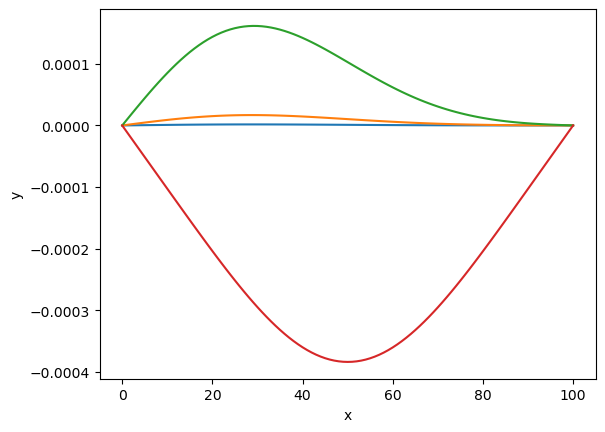

In [20]:
import numpy as np
import matplotlib.pyplot as plt

v = 100
L = 1
d = 0.1
C = 1
sigma = 0.3
h = 1e-6
N = 100
a = L/N
epsilon = h/1000

tend = 50e-3
t1 = 1e-5
t2 = 1e-4
t3 = 1e-3
t4 = 15e-3

T = np.empty(N+1, float)
T[:] = 0 
Tp = np.empty(N+1, float)
for i in range(N+1):
    Tp[i] = C*(a*i)*(L-a*i)*np.exp(-(a*i -d)**2/(2*sigma**2))/(L**2) 
T2 = np.empty(N+1,float)
T3 = np.empty(N+1,float)

t = 0.0
c = h*(v**2)/(a*a)

while t<tend:
    T2[1:N] = T[1:N] + h*Tp[1:N]
    T3[1:N] = Tp[1:N] + c*(T[0:N-1] + T[2:N+1] - 2*T[1:N])
    T2,T = T,T2
    Tp,T3 = T3,Tp
    t += h
    
    if abs(t-t1)<epsilon:
        plt.plot(T)
    if abs(t-t2)<epsilon:
        plt.plot(T)
    if abs(t-t3)<epsilon:
        plt.plot(T)
    if abs(t-t4)<epsilon:
        plt.plot(T)
        
plt.xlabel("x")
plt.ylabel("y")
plt.show